[*********************100%%**********************]  1 of 1 completed


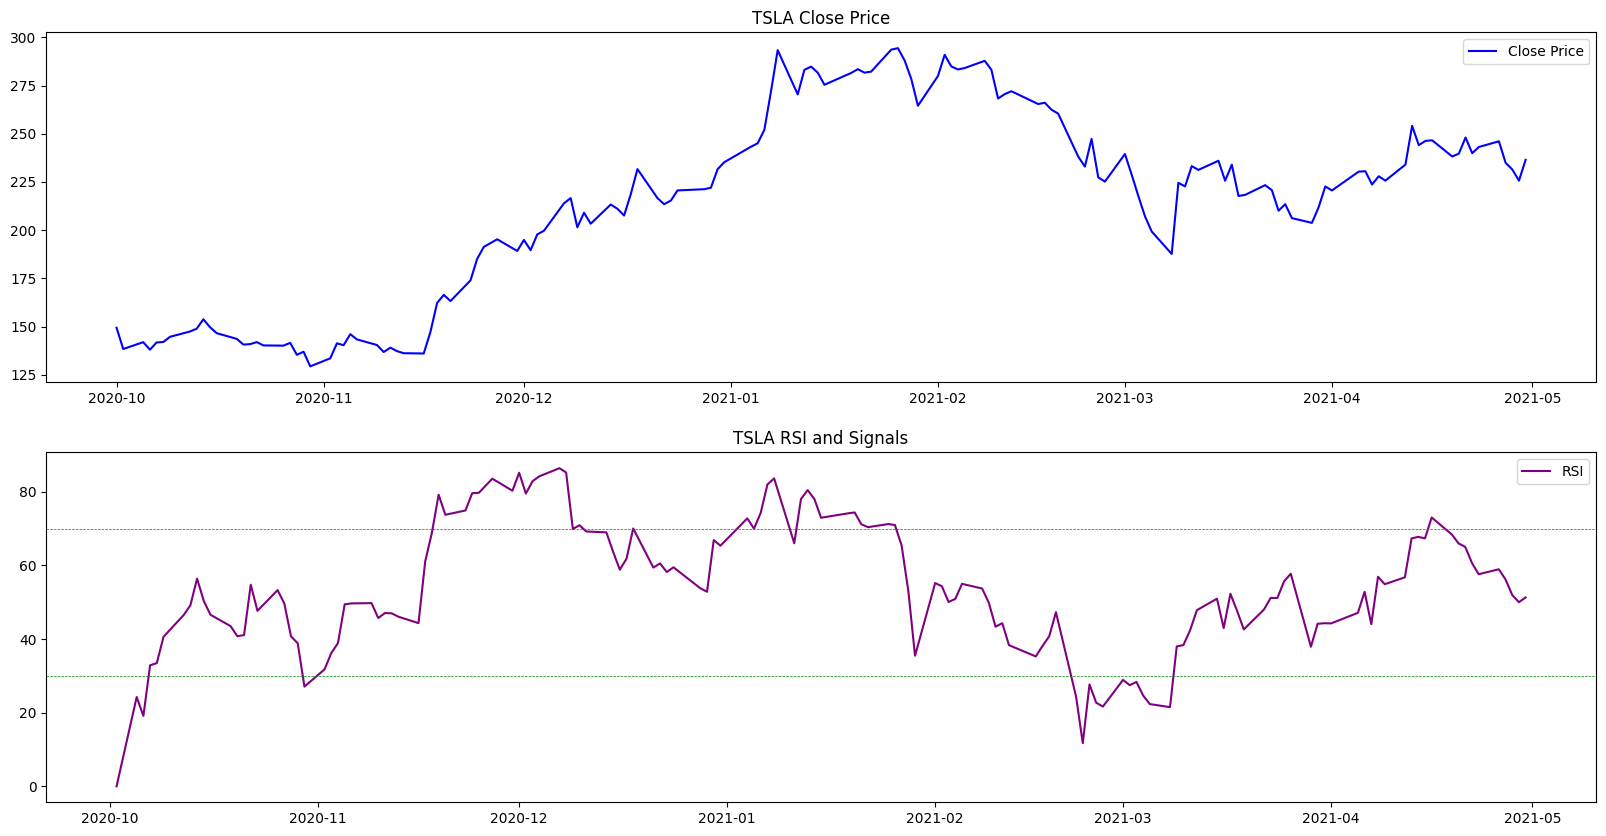

In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker and date range
ticker = "TSLA"
start = dt.date(2020, 10, 1)
end = dt.date(2021, 5, 1)

# Download data
ticker_data = yf.download(ticker, start=start, end=end)

# RSI calculation parameters
RSI_window = 14

# Calculate price changes
delta = ticker_data['Close'].diff()

# Separate gains and losses
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# Calculate average gain and loss
avg_gain = gain.rolling(window=RSI_window, min_periods=1).mean()
avg_loss = loss.rolling(window=RSI_window, min_periods=1).mean()

# Calculate RSI
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Determine buy and sell signals
ticker_data['RSI'] = rsi
ticker_data['Buy Signal'] = np.where(ticker_data['RSI'] < 30, 1, 0)
ticker_data['Sell Signal'] = np.where(ticker_data['RSI'] > 70, -1, 0)
ticker_data['Signal'] = ticker_data['Buy Signal'] + ticker_data['Sell Signal']

# Plotting
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(ticker_data['Close'], label='Close Price', color='blue')
plt.title(f'{ticker} Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ticker_data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', linewidth=0.5)
plt.axhline(30, color='green', linestyle='--', linewidth=0.5)
plt.title(f'{ticker} RSI and Signals')
plt.legend()

plt.show()
